# Deep learning thực nghiệm 

## Thí nghiệm 1: Can thiệp lên số node và số hidden_layer 

### BS. Lê Ngọc Khả Nhi

## Giới thiệu

Như chúng ta đã biết, Deep learning hiện đang là một hướng đi rất thịnh hành và hấp dẫn với nhiều ưu điểm được hứa hẹn như: khả năng giải quyết được các vấn đề khó trên dữ liệu phức tạp, việc xây dựng và huấn luyện mô hình nhẹ nhàng..., ngoài ra sự phong phú về tài liệu và phần mềm hỗ trợ, cấu trúc mô hình dựng sẵn... cho phép bất cứ ai cũng có thể tìm hiểu và ứng dụng Deep learning. Tuy nhiên, sự đơn giản và tiện lợi này của Deep learning cũng là một nguy cơ đối với những người ngây thơ - quen làm việc theo công thức máy móc nhưng thiếu kiến thức cơ bản về phương pháp này, không lường hết sự phức tạp của hàng chục thành phần, yếu tố bên trong.

Để hiểu rõ những yếu tố kỹ thuật bên trong mô hình Deep learning, ta có thể đi theo nhiều con đường - các bạn giỏi toán sẽ chọn con đường lý thuyết cơ bản, các bạn không có đủ kiến thức toán có thể lấy cần cù bù thông minh bằng cách đọc nhiều tài liệu và tiếp thu theo kinh nghiệm người đi trước. Tuy nhiên, còn một con đường khác mà Nhi sẽ giới thiệu với các bạn trong series Deep learning thực nghiệm này - đó là nghiên cứu về Deep learning một cách chủ động, theo tinh thần khoa học, làm những thí nghiệm trên dữ liệu và algorithm để tự trả lời câu hỏi, giả thuyết của bản thân. Theo kinh nghiệm từ quá trình tự học Machine learning, Nhi cho rằng đây là con đường phù hợp nhất cho những người ngoại đạo Data science. 

## Thí nghiệm thứ 1: Vai trò của số node và số layer 

Trong bài đầu tiên, ta sẽ cùng làm thí nghiệm để trả lời các câu hỏi liên quan đến cấu trúc của mô hình, cụ thể là vai trò số node trong một layer và số layer đối với hiệu quả của mô hình Deep learning.

Với người từ phái thống kê, Deep learning là một loại mô hình kì dị, vì xuất phát điểm của nó không phải là một hàm cụ thể (khác với mô hình đa thức, tuyến tính...), nhưng ta phải xây dựng kiến trúc của mạng neuron và hy vọng rằng kiến trúc này cho phép mô hình tự "học" được một hàm (phức tạp), tối ưu cho 1 dữ liệu, 1 bài toán chuyên biệt nào đó. Việc đưa thêm nhiều nodes, nhiều layer vào mạng Deep neuralnet có thể được hình dung tương tự như việc đưa thêm bậc đa thức, interaction effect hay các hàm spline vào mô hình tuyến tính, chúng làm tăng "capacity" của mô hình. Tuy nhiên, liệu một neural net kích thước rất lớn, rất sâu có đồng nghĩa với hiệu quả cao hơn hay không ?

Ít người đặt ra câu hỏi này: Ta cần bao nhiêu nodes hoặc bao nhiêu layer là đủ ? Các tài liệu, giáo trình không giúp ta trả lời câu hỏi này, vì đa số tác giả đều chọn những con số ngẫu nhiên, tùy tiện như 10,32,64 nodes ... và đặt người học vào thói quen, công thức. 

## Mục tiêu và phương pháp 

Mục tiêu của thí nghiệm này nhằm khảo sát ảnh hưởng của sự: (1) gia tăng số nodes trên một layer duy nhất và (2) gia tăng số hidden_layers với số node cố định, lên hiệu năng của mô hình deep learning. 

Phương pháp : 

Giả lập một bài toán phân loại multiclass bằng hàm mô phỏng dữ liệu của scikit-learn. Dữ liệu mô phỏng gồm 1000 instances, 20 classes và 100 features là biến liên tục. Dữ liệu này được chia ngẫu nhiên thành train_set và test_set với kích thước bằng nhau là 50%.

Thí nghiệm 1a): Sử dụng mô hình deep neuralnet với 1 hidden layer duy nhất, sau đó gia tăng dần số node của layer này lần lượt là 2,4,6,8,10,16,32,64,128, cuối cùng là 256 nodes. So sánh hiệu năng của 10 phiên bản mô hình này trên 10 lượt tái chọn mẫu (bootstrap). 

Thí nghiệm 1b): Sử dụng mô hình deep neuralnet với số hidden layer được gia tăng dần từ 1,2,3,4,5 lớp. Biết rằng mỗi lớp chứa 16 nodes như nhau. So sánh hiệu năng của 5 phiên bản mô hình này trên 10 lượt tái chọn mẫu (bootstrap). 

Tiêu chí so sánh là giá trị hàm loss, accuracy và kappa.

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.datasets.samples_generator import make_blobs

from sklearn.metrics import cohen_kappa_score as kappa

from numpy import where
from numpy import argmax

Trước hết, Nhi giải thích thêm về hàm mô phỏng dữ liệu của scikit-learn, đây là một công cụ rất tiện lợi khi học Machine learning. Trong thí dụ minh họa sau, Nhi dùng hàm make_blobs để tạo ra 1 dữ liệu mô phỏng cho bài toán phân loại multiclass với 10 classes và 2 features:

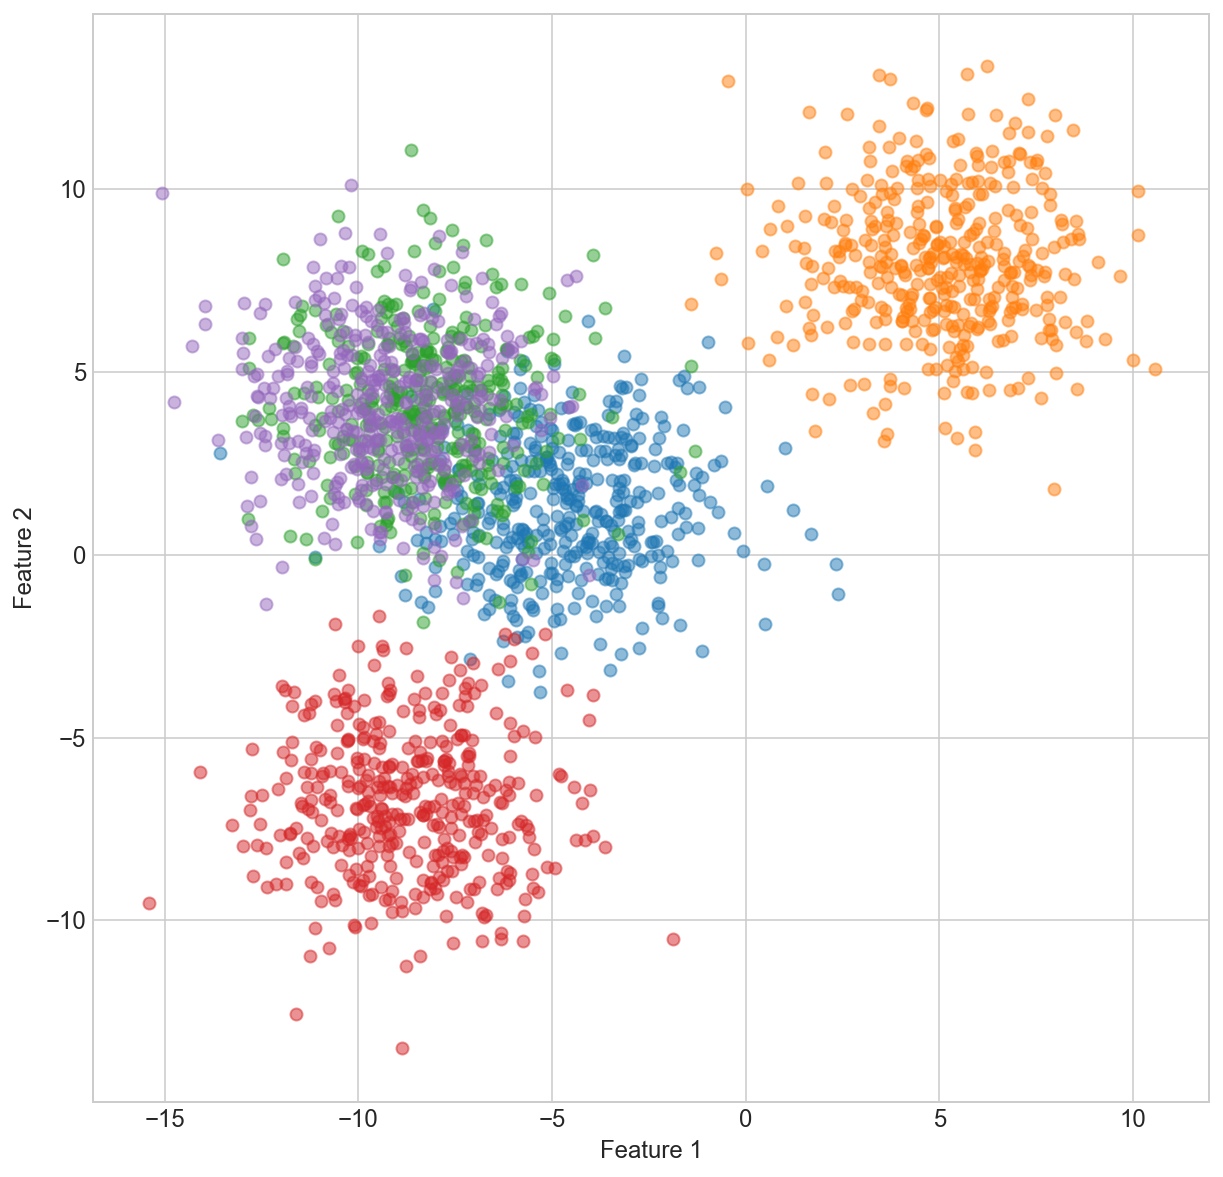

In [56]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=2000,
                  centers=5, 
                  n_features=2,
                  cluster_std=2)
# scatter plot for each class value
plt.figure(figsize=(10,10))
for class_value in range(5):
    row_id = where(y == class_value)
    plt.scatter(X[row_id, 0], 
                X[row_id, 1],
                alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
# show plot
plt.show()

## Thí nghiệm 1A: Thay đổi số nodes trên 1 layer duy nhất

Đầu tiên, ta chuẩn bị 1 hàm làm công việc tạo dữ liệu mô phỏng cho thí nghiệm. Hàm này xuất kết quả là 4 arrays trainX, trainy, testX, testy, với 500 instances, 100 features và 20 classes, với shape phù hợp cho mô hình keras.

In [57]:
def create_dataset(size=1000,
                   labels=20,
                   n_features=100,
                   noise_std=3,
                   train_ratio=0.5):
    X, y = make_blobs(n_samples = size, 
                      centers = labels, 
                      n_features = n_features, 
                      cluster_std = noise_std)
    y = to_categorical(y)
    n_train = int(size*train_ratio)
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [58]:
trainX, trainy, testX, testy = create_dataset()

In [59]:
trainX.shape

(500, 100)

In [19]:
testX.shape

(500, 100)

In [20]:
trainy.shape

(500, 20)

In [21]:
testy.shape

(500, 20)

Tiếp theo, ta viết 1 hàm để dựng mô hình deep neuralnet với cấu trúc là lớp input nhận 100 features, 1 lớp hidden duy nhất với số node là n_nodes, và 1 lớp output với kích thước n_labels = 20. Mô hình được luyện với hàm optimizer là "adam", hàm loss là categorical_crossentropy, qua 50 epochs, batch size = 32.

In [60]:
def node_experiment(n_nodes,trainX, trainy, testX, testy):
    n_features,n_labels = trainX.shape[1], testy.shape[1]
    model = Sequential()
    model.add(Dense(n_nodes,
                    input_dim=n_features, 
                    activation='relu',
                    kernel_initializer='he_uniform'))
    model.add(Dense(n_labels,
                    activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer="adam", 
                  metrics=['categorical_accuracy'])
    hist = model.fit(trainX, 
                     trainy, 
                     epochs=50,
                     batch_size=32,
                     verbose=0)
    y_pred = model.predict_classes(testX)
    y_truth = argmax(testy, axis=1)
    kap_coef = kappa(y_truth, y_pred)
    _, acc = model.evaluate(testX, testy, verbose=0)
    return hist, acc, kap_coef

Ta tiến hành thí nghiệm trên 1 mẫu dữ liệu hiện thời, nội dung như đã giải thích: ta gia tăng số nodes dần từ 2 đến 256 và tại mỗi giá trị n_nodes, ta ước lượng kappa và accuracy.

nodes=2: 0.27200 0.23689
nodes=4: 0.67600 0.65910
nodes=6: 0.87200 0.86530
nodes=8: 0.94000 0.93676
nodes=10: 0.99600 0.99579
nodes=16: 0.94800 0.94520
nodes=32: 0.85400 0.84605
nodes=64: 0.94600 0.94311
nodes=128: 0.76000 0.74669
nodes=256: 0.77800 0.76651


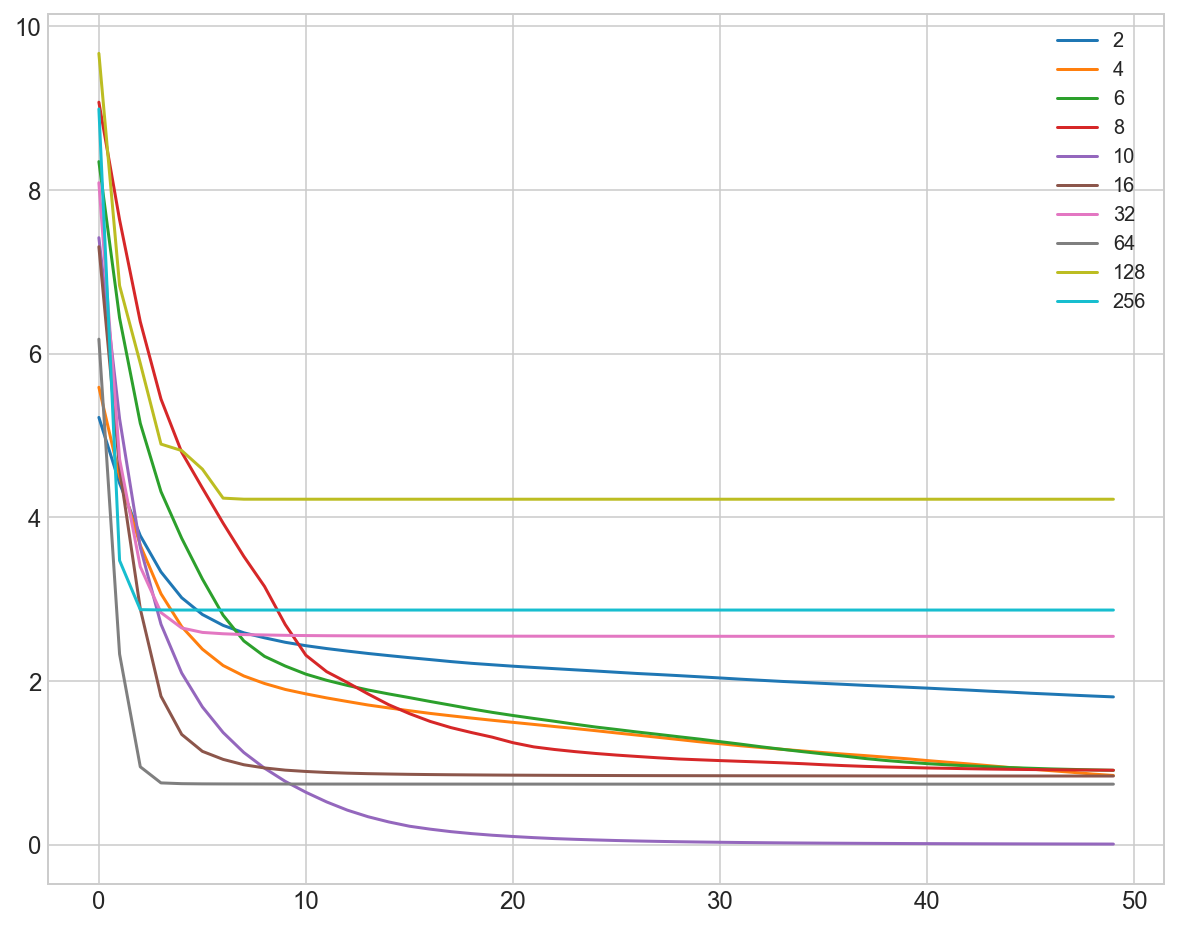

In [61]:
acc_list=[]
kappa_list = []
num_nodes = [2,4,6,8,10,16,32,64,128,256]

plt.figure(figsize=(10,8))
for n_nodes in num_nodes:
    hist,acc,kap = node_experiment(n_nodes,
                                   trainX, trainy, 
                                   testX, testy)
    acc_list.append(acc)
    kappa_list.append(kap)
    print('nodes=%d: %.5f %.5f'%(n_nodes, acc, kap))
    plt.plot(hist.history['loss'], label=str(n_nodes))

plt.legend()
plt.show()

Kết quả cho thấy: Khi tăng số node từ 2 đến 16, Accuracy và Kappa score kiểm trên tập testset của mô hình tăng dần, tuy nhiên  khi tăng số node lên cao hơn như 32, 64, 128 hay 256 không hề giúp cải thiện độ chính xác của mô hình, trái lại còn giảm dần độ chính xác của mô hình.

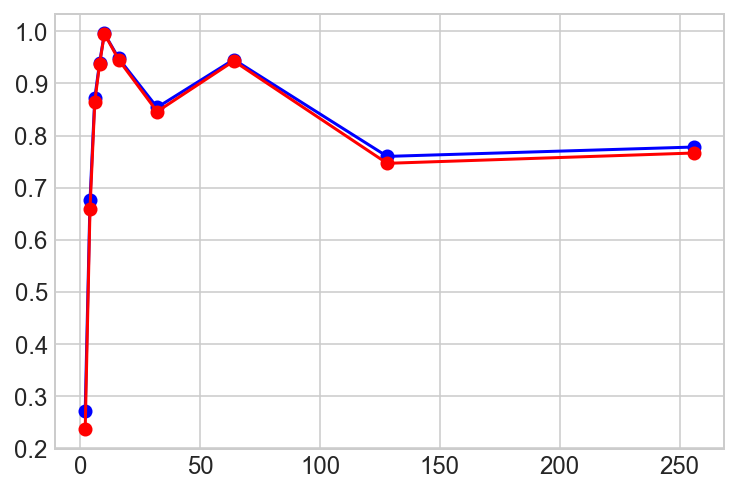

In [62]:
plt.plot(num_nodes,acc_list,"bo-")
plt.plot(num_nodes,kappa_list,"ro-")

Dù sao, đây cũng chỉ là một trường hợp cá thể cho 1 mẫu; nên Nhi sẽ lặp lại thí nghiệm này trên 10 mẫu khác nhau và so sánh một lần nữa chỉ số kappa giữa 10 phiên bản mô hình có số node từ 2 - 256. Trong thí nghiệm này, Nhi sử dụng thêm chế độ early stopping nhằm đảm bảo mỗi mô hình đạt trạng thái tối ưu trên tập train mà không bị overfit; đồng thời tăng kích thước batch size lên 100 để đạt tốc độ huấn luyện nhanh hơn.

In [79]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=0)

def node_experiment_short(n_nodes,trainX, trainy, testX, testy):
    n_features,n_labels = trainX.shape[1], testy.shape[1]
    model = Sequential()
    model.add(Dense(n_nodes,
                    input_dim=n_features,
                    activation='relu',
                    kernel_initializer='he_uniform'))
    model.add(Dense(n_labels,
                    activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer="adam", 
                  metrics=['categorical_accuracy'])
    model.fit(trainX,trainy, epochs=50,
              batch_size=100,verbose=0,
              callbacks=[early_stop])
    y_pred = model.predict_classes(testX)
    y_truth = argmax(testy, axis=1)
    kap_coef = kappa(y_truth, y_pred)
    return kap_coef

df = pd.DataFrame()
num_nodes = [2,4,6,8,10,16,32,64,128,256]

for resample_idx in range(10):
    trainX, trainy, testX, testy = create_dataset()
    for n_nodes in num_nodes:
        kap = node_experiment_short(n_nodes,trainX, trainy,testX, testy)
        df = df.append({'resample': str(resample_idx), 
                        'n_nodes': str(n_nodes),
                        'Kappa': kap}, ignore_index=True)
    print(resample_idx)

0
1
2
3
4
5
6
7
8
9


Kết quả thí nghiệm được lưu lại thành dataframe df:

In [87]:
df

,Kappa,n_nodes,resample
0,0.137521,2,0
1,0.376897,4,0
2,0.829383,6,0
3,0.854665,8,0
4,0.913699,10,0
5,0.945171,16,0
6,0.894560,32,0
7,0.947266,64,0
8,0.949383,128,0
9,0.890473,256,0


Hình ảnh trên boxplot khẳng định kết quả mà ta đã thấy ở trên: Hiệu năng của mô hình được cải thiện tăng dần khi ta tăng số nodes từ 2,4,68,10 và đạt tối ưu ở số node = 16. Khi tăng thêm số nodes lên 32,64,128,256 thì độ chính xác của mô hình bị giảm dần:

Text(0,0.5,'Cohen Kappa')

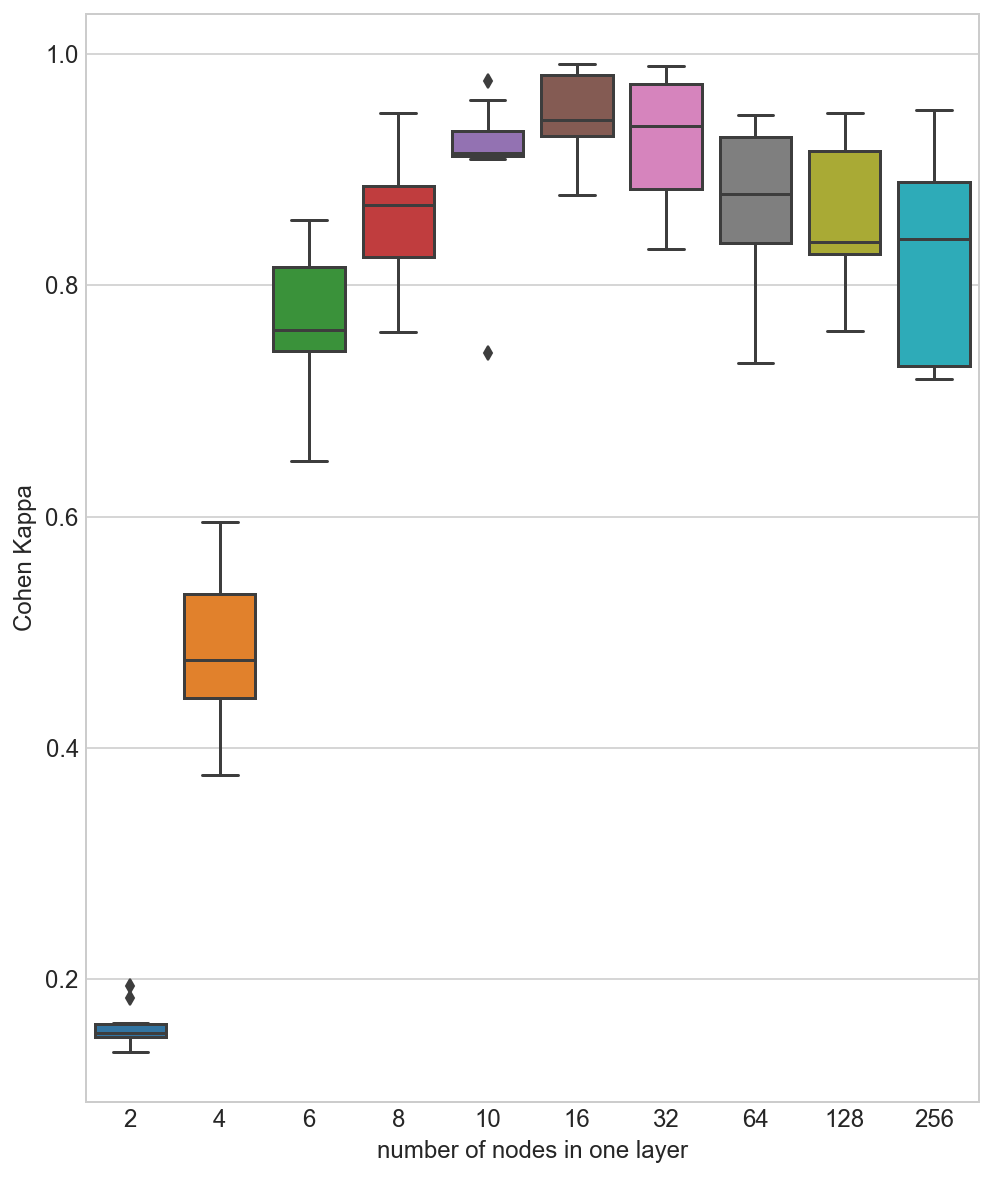

In [96]:
plt.figure(figsize=(8,10))
sns.boxplot(x='n_nodes',y='Kappa',data=df,
            order=['2','4','6','8','10','16','32','64','128','256'])
plt.xlabel('number of nodes in one layer')
plt.ylabel('Cohen Kappa')

Như vậy, có thể rút ra một số nhận xét như sau:

1) Dù chỉ cần 1 hidden layer duy nhất, một mô hình deep learning cũng có khả năng giải quyết bài toán phức tạp nếu nó có đủ số nodes cần thiết.

2) Một mô hình quá rộng (nhiều nodes hơn) không có nghĩa là nó tốt hơn, thậm chí ngược lại. Quan trọng là số nodes phải vừa đủ, không quá nhiều cũng không quá ít. 

Không thể đoán được bao nhiêu nodes trong mỗi layer thì đủ, ta chỉ biết rằng việc gia tăng số nodes chỉ có ý nghĩa tích cực khi nó còn mở rộng khả năng "học" của layer đó một cách tương thích với độ phức tạp của bài toán, cho phép mô hình "nghiệm" ra và trữ được một hàm tối ưu, phù hợp với độ phức tạp của thông tin trong dữ liệu đầu vào, cho phép chuyển thông tin này thành kết quả chính xác. Thứ ta cần là một mô hình mạnh vừa đủ để chuyên chở hàm này, chứ không phải là một mô hình quá rộng. Dĩ nhiên, nhiều nodes hơn sẽ gây tốn kém thời gian và bộ nhớ khi huấn luyện cũng như khi prediction và tăng nguy cơ overfit.

## Thí nghiệm 1B

Để chuẩn bị, Nhi tạo ra một bộ dữ liệu mô phỏng mới. Sau đó, Nhi viết 1 hàm layer_experiment có nội dung như sau: Với 1 con số n_hidden_layers cho trước, ta dựng một mô hình deep neuralnet có số lớp hidden_layer bằng với con số này, mỗi lớp chứa 16 nodes (là số nodes tối ưu mà ta biết từ thí nghiệm 1A). Mô hình được luyện trên trainset với batchsize = 100, 50 epochs, rồi sau đó kiểm định trên testset để ước tính Accuracy và Kappa.

In [100]:
trainX, trainy, testX, testy = create_dataset()

In [106]:
def layer_experiment(n_hidden_layers, 
                   trainX, trainy, 
                   testX, testy):
    n_features,n_labels = trainX.shape[1], testy.shape[1]
    model = Sequential()
    model.add(Dense(units=16, 
                    input_dim=n_features, 
                    activation='relu', 
                    kernel_initializer='he_uniform'))
    for _ in range(1, n_hidden_layers-1):
        model.add(Dense(units=16,
                        activation='relu', 
                        kernel_initializer='he_uniform'))
    model.add(Dense(units=n_labels,
                        activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer="adam", 
                  metrics=['categorical_accuracy'])
    hist = model.fit(trainX, 
                     trainy,
                     epochs=50,
                     batch_size=100,
                     verbose=0)
    y_pred = model.predict_classes(testX)
    y_truth = argmax(testy, axis=1)
    kap_coef = kappa(y_truth, y_pred)
    _, acc = model.evaluate(testX, testy, verbose=0)
    return hist, acc, kap_coef

Thí nghiệm được tiến hành như dự tính; 5 phiên bản mô hình với số layers tăng dần từ 1 đến 5.

n hidden layer=1: 0.99000 0.98947
n hidden layer=2: 0.99000 0.98947
n hidden layer=3: 0.97800 0.97682
n hidden layer=4: 0.98200 0.98104
n hidden layer=5: 0.97200 0.97050


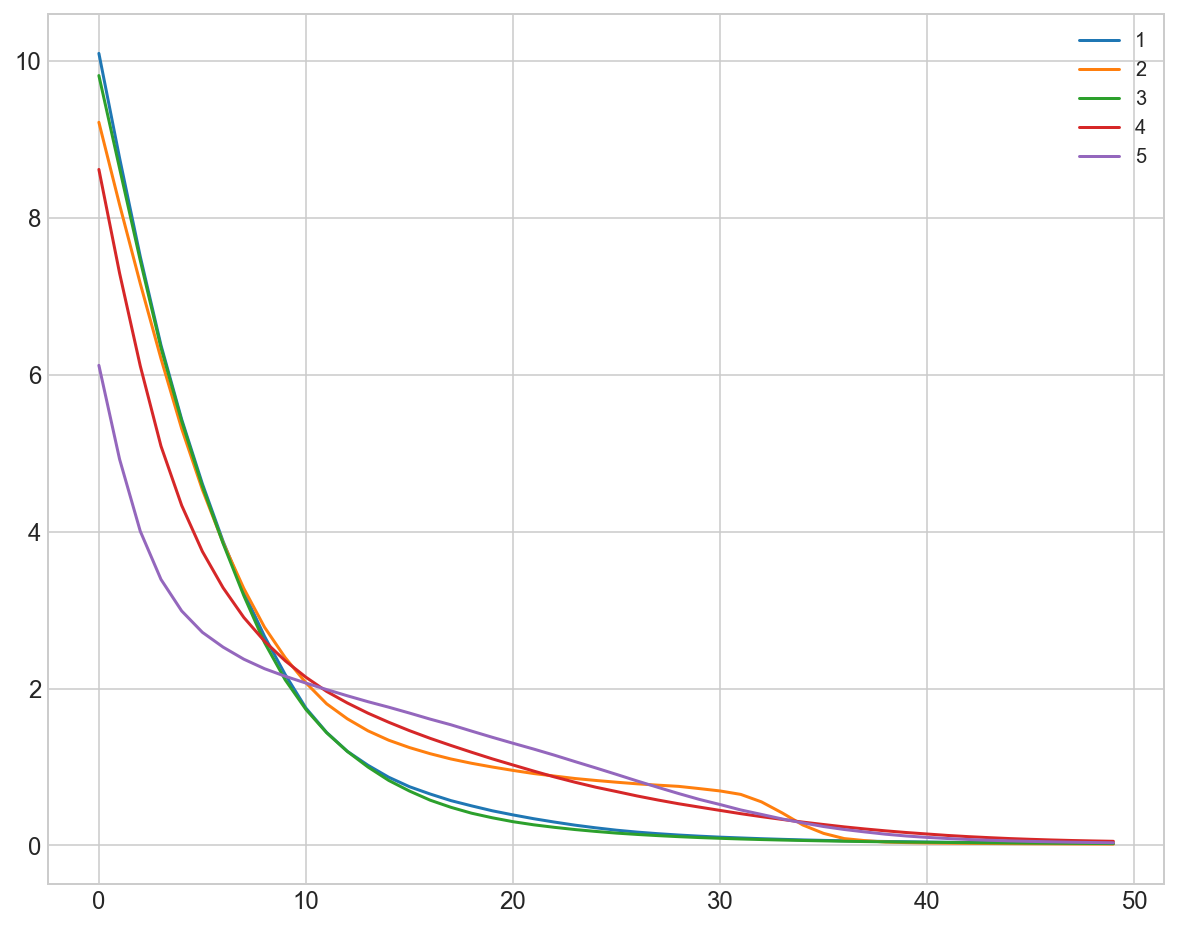

In [108]:
acc_list=[]
kappa_list = []

plt.figure(figsize=(10,8))
for n_hidden_layers in num_layers:
    hist, acc, kap = layer_experiment(n_hidden_layers, 
                                    trainX, trainy,
                                    testX, testy)
    acc_list.append(acc)
    kappa_list.append(kap)
    print('n hidden layer=%d: %.5f %.5f'%(n_hidden_layers, acc, kap))
    plt.plot(hist.history['loss'], label=str(n_hidden_layers))

plt.legend()
plt.show()

Kết quả cho thấy: Chỉ với 1 hidden_layer, mô hình đã có kết quả rất ấn tượng là Accuracy = 0.990 và Kappa = 0.989.
Việc gắn thêm 1 layer nữa không giúp cải thiện hiệu năng của mô hình cao hơn. 
Khi bắt đầu gắn thêm 3,4,5 hidden layer, mô hình trở nên không ổn định, Accuracy và Kappa đều giảm.

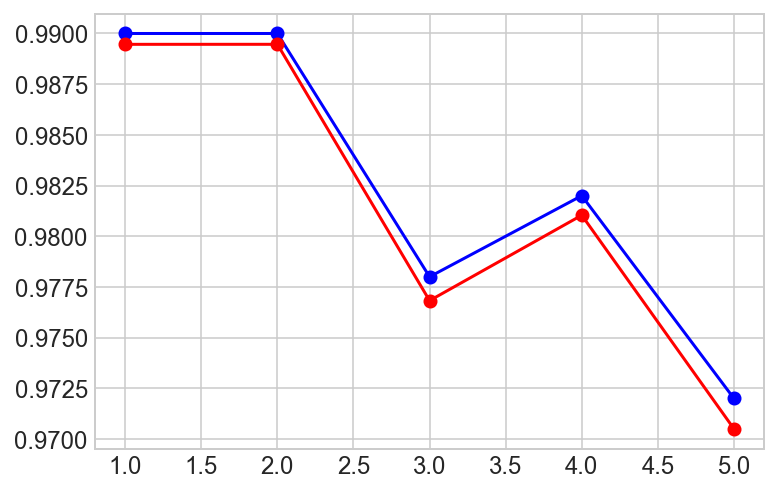

In [109]:
plt.plot(num_layers,acc_list,"bo-")
plt.plot(num_layers,kappa_list,"ro-")

Cũng như lần trước, Nhi không dừng lại ở quan sát 1 mẫu cá thể, nhưng lặp lại thí nghiệm 1B 10 lần trên 10 bài toán phân loại khác nhau và biểu diễn trị số kappa của 5 phiên bản trên một boxplot để so sánh; 

In [111]:
def layer_experiment_short(n_hidden_layers,
                           trainX, trainy, 
                           testX, testy):
    n_features,n_labels = trainX.shape[1], testy.shape[1]
    model = Sequential()
    model.add(Dense(units=16, 
                    input_dim=n_features, 
                    activation='relu', 
                    kernel_initializer='he_uniform'))
    for _ in range(1, n_hidden_layers-1):
        model.add(Dense(units=16,
                        activation='relu', 
                        kernel_initializer='he_uniform'))
    model.add(Dense(units=n_labels,
                        activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer="adam", 
                  metrics=['categorical_accuracy'])
    model.fit(trainX,trainy,
                     epochs=50,batch_size=100,verbose=0,
                     callbacks=[early_stop])
    y_pred = model.predict_classes(testX)
    y_truth = argmax(testy, axis=1)
    kap_coef = kappa(y_truth, y_pred)
    return kap_coef

df = pd.DataFrame()

for resample_idx in range(10):
    trainX, trainy, testX, testy = create_dataset()
    for n_hidden_layers in num_layers:
        kap = layer_experiment_short(n_hidden_layers,trainX, trainy,testX, testy)
        df = df.append({'resample': str(resample_idx), 
                        'n_hidden_layers': str(n_hidden_layers),
                        'Kappa': kap}, ignore_index=True)
    print(resample_idx)

0
1
2
3
4
5
6
7
8
9


Text(0,0.5,'Cohen Kappa')

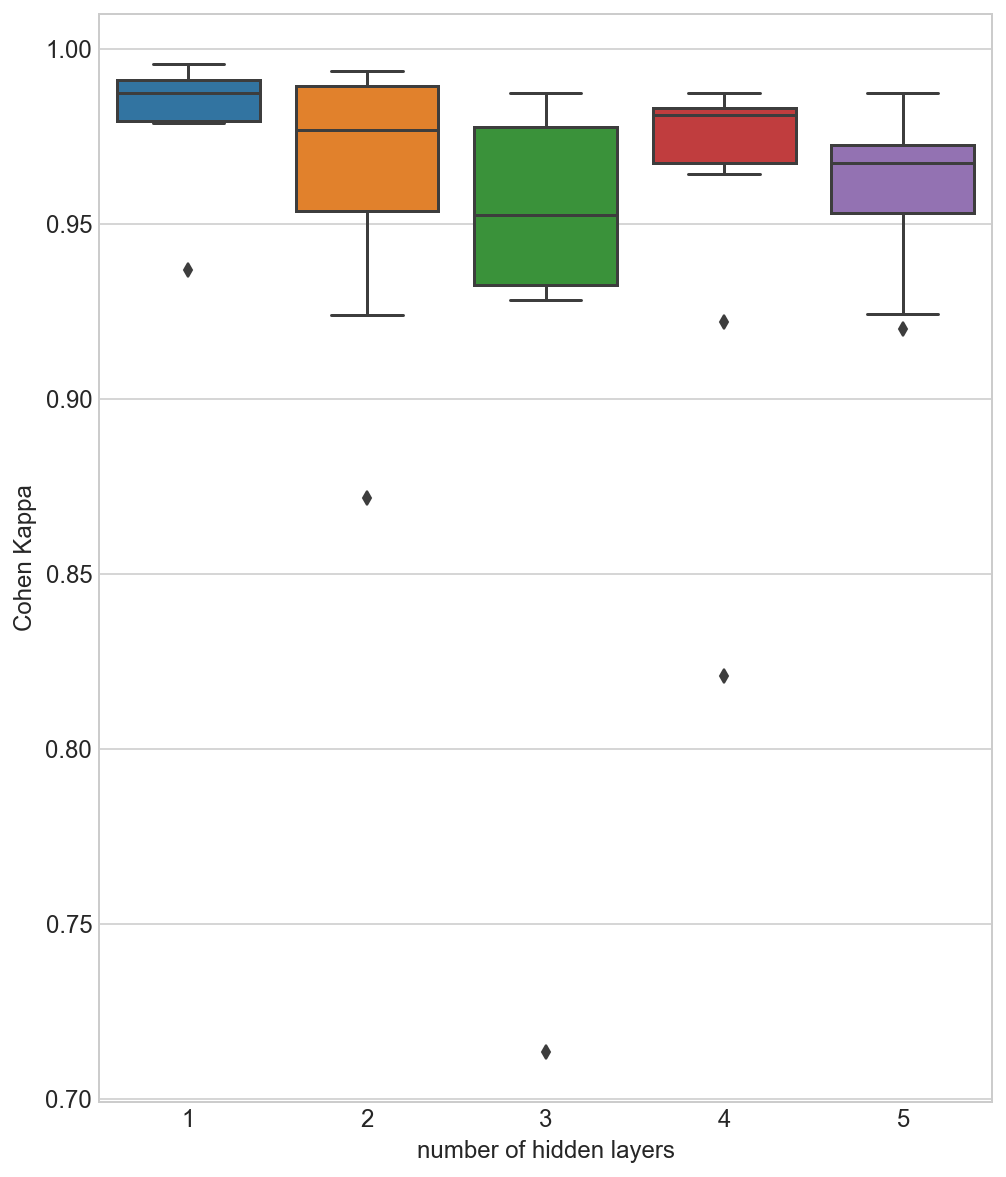

In [112]:
plt.figure(figsize=(8,10))
sns.boxplot(x='n_hidden_layers',
            y='Kappa',
            data=df,
            order=['1','2','3','4','5'])
plt.xlabel('number of hidden layers')
plt.ylabel('Cohen Kappa')

Kết quả tổng hợp từ 10 lần thí nghiệm cho phép khẳng định rằng: Mô hình với 1 hidden layer là ổn định nhất và có hiệu năng tối ưu nhất, và một khi cấu trúc cơ bản đã tốt, thì  việc gia tăng thêm nhiều hidden layer chỉ là điều vô ích, thậm chí bất lợi vì tiêu tốn thời gian và bộ nhớ nhiều hơn, trong khi độ chính xác không tăng thêm mà thậm chí còn giảm.

## Kết luận:

Qua thí nghiệm vừa thực hiện, ta có thể thấy rằng: Khả năng "học" dữ liệu của mô hình deep learning (gọi là model capacity) tùy thuộc vào kiến trúc của mạng neuron với 2 yếu tố: số layer và số node trong mỗi layer.

Một mạng neuron chỉ cần 1 hidden layer với số lượng node vừa đủ, cũng có khả năng học, ghi nhớ và vận hành được một hàm tối ưu cho phép chuyển dữ liệu đầu vào thành kết quả một cách chính xác, tuy nhiên không có nghĩa là 1 layer chứa càng nhiều node càng tốt, thậm chí ngược lại.

Số layer (gọi là độ sâu) của mạng neuron là một cách để mở rộng model capacity. Trong đa số trường hợp khi ta chưa biết số nodes tối ưu thì tăng layers là một con đường tắt đi đến kết quả mong muốn. Tuy nhiên, một khi mô hình đã đạt trạng thái tối ưu thì việc gia tăng số layer hoàn toàn vô ích, thậm chí còn có hại vì làm cho mô hình mất ổn định, kém chính xác.

Tạm biệt và hẹn gặp lại các bạn trong các thí nghiệm tiếp theo vào lần tới.